In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import optimize

%matplotlib inline 
import matplotlib.pyplot as plt

from simul_functions import generate_toy_data, get_bootstrap_data, set_intensity, get_data_to_fit
from simul_functions import get_attenuation_parameters


In [2]:
# input parameters for the simualtions
minE = 10**15 #eV
maxE = 10**18 #eV
gamma = -2.5 # slope of the spectrum

#relation between energy and s38
A = 10**12
B = 1.2

#attenuation true numbers
alpha = 0.919
beta = -1.13

#number of events to generate
events = 10000
#number of bins for the zenith 
nr_of_bins = 8

data = generate_toy_data(events, minE, maxE, gamma, A, B, alpha, beta)

#print(data)

(array([ 89.,  96.,  94., 110., 107.,  90., 111., 108., 102., 100., 122.,
         96.,  99., 107.,  92.,  89., 118., 110., 102.,  92., 109., 103.,
         86.,  94., 109.,  90., 102.,  94., 119.,  95., 103., 120., 117.,
         83., 114.,  98., 102.,  97.,  92., 102.,  93.,  92.,  93.,  94.,
         97., 106., 103., 105., 104., 109.,  91., 101.,  90.,  96., 106.,
        108.,  90.,  94., 114., 109.,  89.,  94.,  92.,  99.,  84.,  87.,
         94., 120., 102.,  91.,  97.,  96.,  98., 106., 103., 105.,  99.,
         99.,  90., 101., 100.,  99., 110.,  89.,  95., 102., 123.,  94.,
        113.,  94.,  93.,  89., 101., 115., 105.,  89.,  95.,  93.,  89.,
        108.]),
 array([0.41339958, 0.41926524, 0.4251309 , 0.43099657, 0.43686223,
        0.44272789, 0.44859355, 0.45445921, 0.46032487, 0.46619053,
        0.47205619, 0.47792186, 0.48378752, 0.48965318, 0.49551884,
        0.5013845 , 0.50725016, 0.51311582, 0.51898149, 0.52484715,
        0.53071281, 0.53657847, 0.54244413, 0.

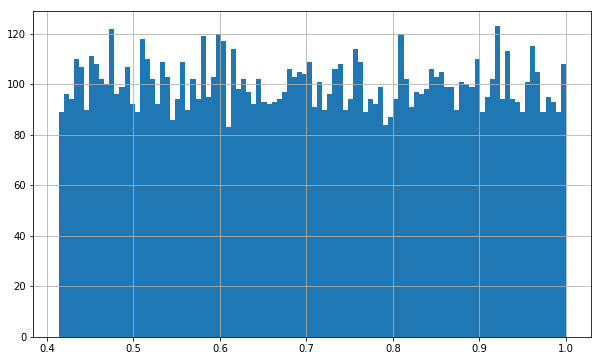

In [3]:
fig1, ax1 =plt.subplots(figsize=(10,6))
plt.grid()

ax1.hist(data.cos2,bins=100 )


In [4]:
#### fit the attenuation curve
data = set_intensity(data, nr_of_bins)
#print(data)        
    
### input value the reference intesity
intensity = 100
s125_fit, bins2, s38_fit , s125_fit_error= get_data_to_fit(data, intensity, nr_of_bins)
print(bins2)
values, cov = get_attenuation_parameters(s125_fit, bins2, performMCMC = False )

print(values)

[0.45529961 0.53909967 0.62289973 0.70669979 0.79049985 0.87429991
 0.95809997]
[  0.96172204  -1.07327953 761.98823022]


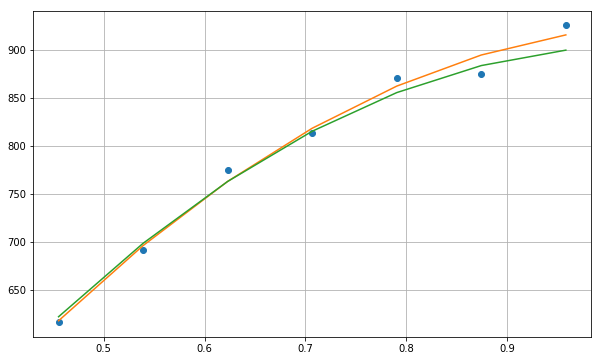

In [5]:
fig2, ax2 =plt.subplots(figsize=(10,6))
plt.grid()
from simul_functions import get_s125 
a1=values[0]
a2=values[1]
a3=values[2]
y=get_s125(bins2, a1,a2,a3)
y2=get_s125(bins2, alpha, beta, a3)

ax2.plot(bins2, s125_fit, lw=0, marker='o')
ax2.plot(bins2,y)
ax2.plot(bins2,y2)

(2, 4)

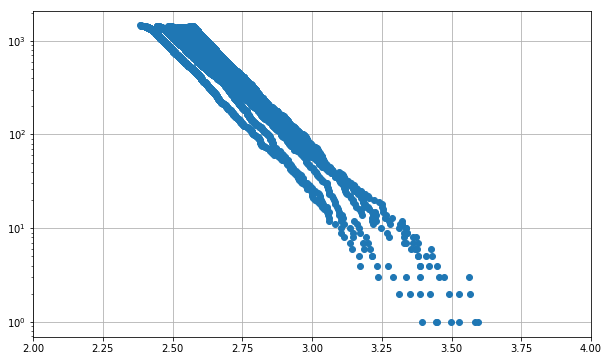

In [6]:
#groups = dict(list(data))
#print(groups)


    
fig1, ax1 =plt.subplots(figsize=(10,6))
plt.grid()

ax1.plot(np.log10(data.s125),data.I, lw=0, marker='o' )
ax1.set_yscale('log')
ax1.set_xlim(2,4)



[  0.90839502  -0.81288368 762.84877586]
[  0.98082657  -1.22294385 771.16974869]


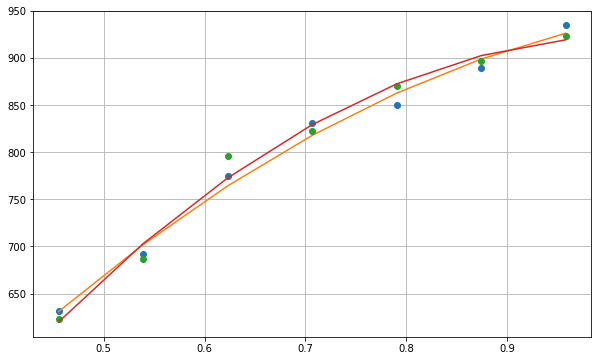

In [7]:
### number of boostrap samples as input
samples = 2
from simul_functions import get_s125

fig2, ax2 = plt.subplots(figsize=(10,6))
plt.grid()
a=[alpha,beta,1]
bootstrap_values=[]
bootstrap_values_2=[]
for j in range(0, samples):
    new_data = get_bootstrap_data(data)
    new_data=set_intensity(new_data, nr_of_bins)
    s125_fit, bins, s38_fit, s125_fit_error = get_data_to_fit(new_data, intensity, nr_of_bins)
    vals, cov_bt = get_attenuation_parameters(s125_fit, bins, performMCMC = False )
    bootstrap_values.append(vals)
    bootstrap_values_2.append(vals**2)
    ax2.plot(bins, s125_fit, lw=0, marker='o')
    ax2.plot(bins, get_s125(bins,vals[0], vals[1], vals[2]))
    print(vals)


Things to do:
1. From the bootstrap get all the values and plot them in an histogram and one vs each other (in one canvas)
2. Give final results: values(from original data) +- rms(vals)
3. Implement MCMC fit in the get_attenuation_parameters function
4. Compare results with 2.
5. See/write to Ioana/Zig

In [ ]:
from simul_functions import bootstrap_graphs

plot=bootstrap_graphs(bootstrap_values, alpha, beta)

In [ ]:
plot.savefig("bootstrap_values2")

In [ ]:
#final results with error
from simul_functions import rms_for_initial_vals

error=rms_for_initial_vals(bootstrap_values, bootstrap_values_2)
final_values_up=values + error
final_values_down=values - error

print(values,'+/-',error)
print(final_values_up)

[ 511.34211554 -236.86710782    3.38039858]


/home/noemie/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/noemie/anaconda3/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.23020083] outside if
-inf [-491.37626752  144.09139379   -2.2

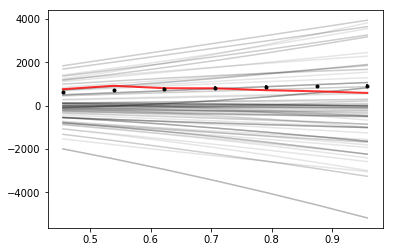

In [8]:
from simul_functions import get_attenuation_parameters2

final_parameters, cov2, sample, sample2 = get_attenuation_parameters2(s125_fit, s38_fit,s125_fit_error, bins, performMCMC=True)

In [ ]:
print(sample)
print(sample2)

In [ ]:
print(a3)
import corner
fig = corner.corner(sample, labels=["$a$","$b$", "$s38$"], truths=[alpha,beta, a3])
fig.savefig("")

In [ ]:
sample[:, 2] = np.exp(sample[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(sample, [16, 50, 84],
                                                axis=0)))